In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from torchwi.utils.plot import plot_vel
from torchwi.io import rsf

In [3]:
def get_data(dirname,shape):
    loss = np.loadtxt(dirname+"/loss.txt",usecols=[0,1])
    vel = np.fromfile(dirname+"/vel.0500",dtype=np.float32)
    return loss, np.reshape(vel,shape)

In [4]:
nz,nx,h, vtrue = rsf.fromfile("../data/data_marm/marm.rsf", "n1 n2 d1 data")
vinit = rsf.fromfile("../data/data_marm/vinit.rsf", "data")

In [5]:
names = ["Adam", "NAG", "Momentum", "GradientDescent"]
dirnames = [
    "../src/time/runs/May18_01-20-34_925924ccf8a8Adam/",
    "../src/time/runs/May18_02-17-18_925924ccf8a8Nag/",
    "../src/time/runs/May18_04-52-45_925924ccf8a8Momentum/",
    "../src/time/runs/May18_05-37-14_925924ccf8a8GD/"
]
losses = {}
vels = {}

In [6]:
for name, dirname in zip(names, dirnames):
    losses[name], vels[name] = get_data(dirname, vinit.shape)

Text(0, 0.5, 'Loss')

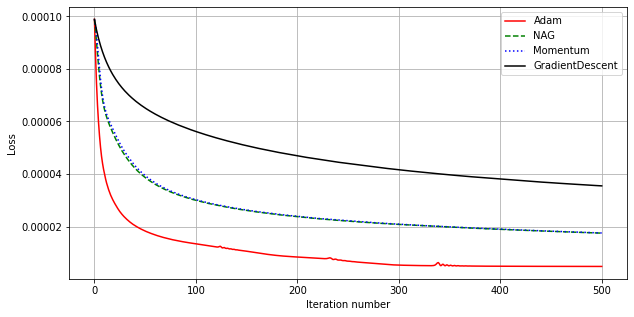

In [7]:
lines = ["r-","g--","b:","k-"]

plt.figure(figsize=[10,5])
for (name, loss), line in zip(losses.items(), lines):
    plt.plot(loss[:,0], loss[:,1], line, label=name)
plt.grid()
plt.legend()
plt.xlabel("Iteration number")
plt.ylabel("Loss")

In [8]:
vmin=1.5
vmax=5.5

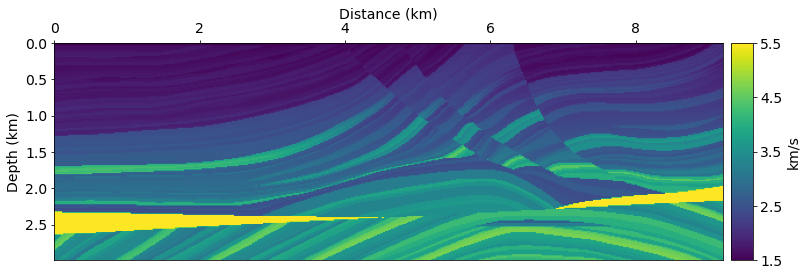

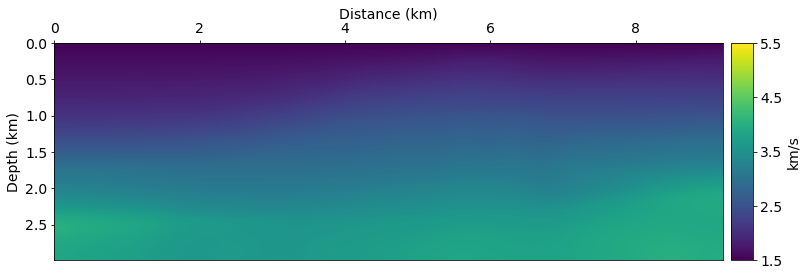

In [9]:
plot_vel(vtrue, h, vmin, vmax)
plot_vel(vinit, h, vmin, vmax)

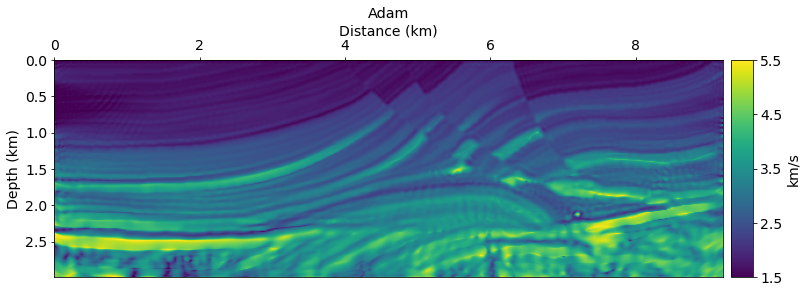

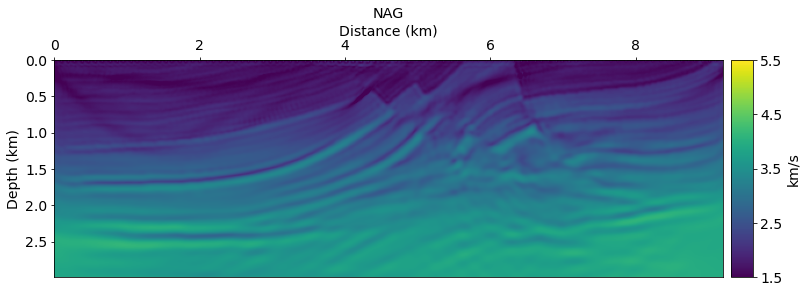

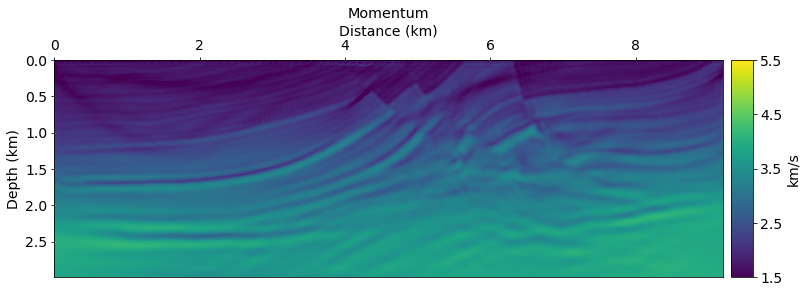

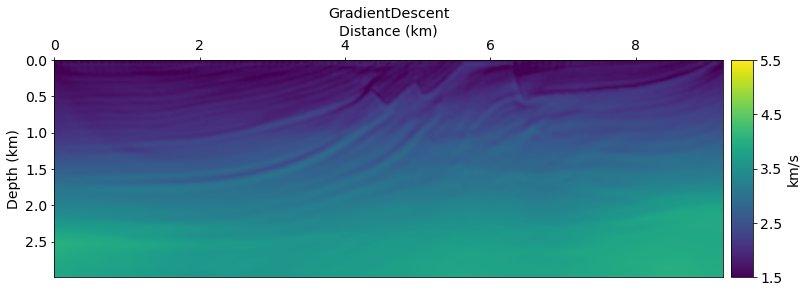

In [10]:
for name, vel in vels.items():
    plot_vel(vel, h, vmin, vmax)
    plt.title(name, fontsize='x-large')